In [1]:
# Importing necessary Libraries
import import_ipynb
import numpy as np 
import pandas as pd 
from pandas.plotting import scatter_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import plotly.express as px
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.tree import export_graphviz
from IPython.display import Image  
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import  KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import  MLPClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
import tensorflow as tf


In [2]:
# reading the dataset as pandas dataframe
df=pd.read_csv("heart.csv")
df.head()

age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0   63    1   3     145   233    1        0       150     0      2.3    0   
1   37    1   2     130   250    0        1       187     0      3.5    0   
2   41    0   1     130   204    0        0       172     0      1.4    2   
3   56    1   1     120   236    0        1       178     0      0.8    2   
4   57    0   0     120   354    0        1       163     1      0.6    2   

   caa  thall  output  
0    0      1       1  
1    0      2       1  
2    0      2       1  
3    0      2       1  
4    0      2       1

In [3]:
#getting shape of data rows and columns
df.shape

(303, 14)

In [4]:
# analyzing data types of dataset
print(df.dtypes)

age           int64
sex           int64
cp            int64
trtbps        int64
chol          int64
fbs           int64
restecg       int64
thalachh      int64
exng          int64
oldpeak     float64
slp           int64
caa           int64
thall         int64
output        int64
dtype: object


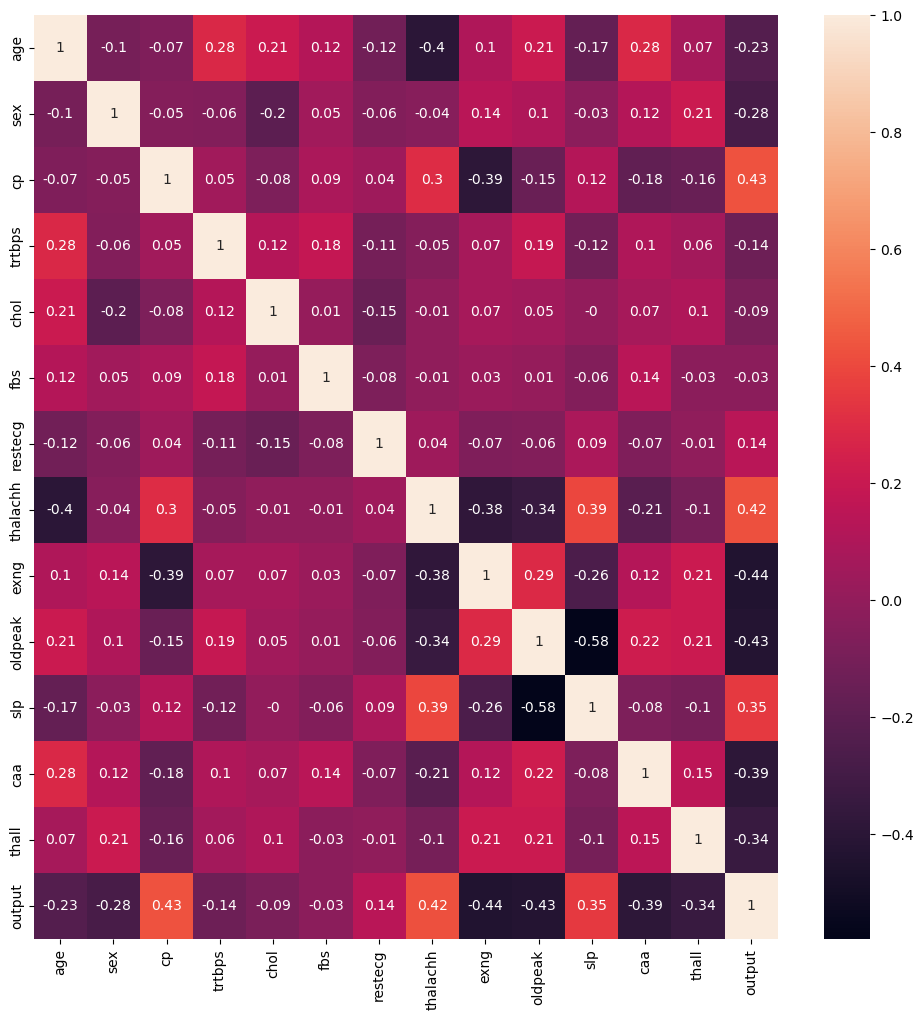

In [5]:
# getting correlation between features
cor = df.corr().round(2)
plt.figure(figsize=(12,12))
sns.heatmap(data=cor,annot=True) #sns: seaborn
plt.show()

In [6]:
#splitting data to features and output
y = df['output'] 
x = df.drop(['output'], axis = 1)
x.head()

age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0   63    1   3     145   233    1        0       150     0      2.3    0   
1   37    1   2     130   250    0        1       187     0      3.5    0   
2   41    0   1     130   204    0        0       172     0      1.4    2   
3   56    1   1     120   236    0        1       178     0      0.8    2   
4   57    0   0     120   354    0        1       163     1      0.6    2   

   caa  thall  
0    0      1  
1    0      2  
2    0      2  
3    0      2  
4    0      2

In [7]:
# interactive graph between Age and cholesterol in mg/dl

px.scatter(df,x="age",y="chol",color="output",title="Influence Age and cholesterol")

<AxesSubplot:title={'center':'Male & Female have heart attack'}, ylabel='output'>

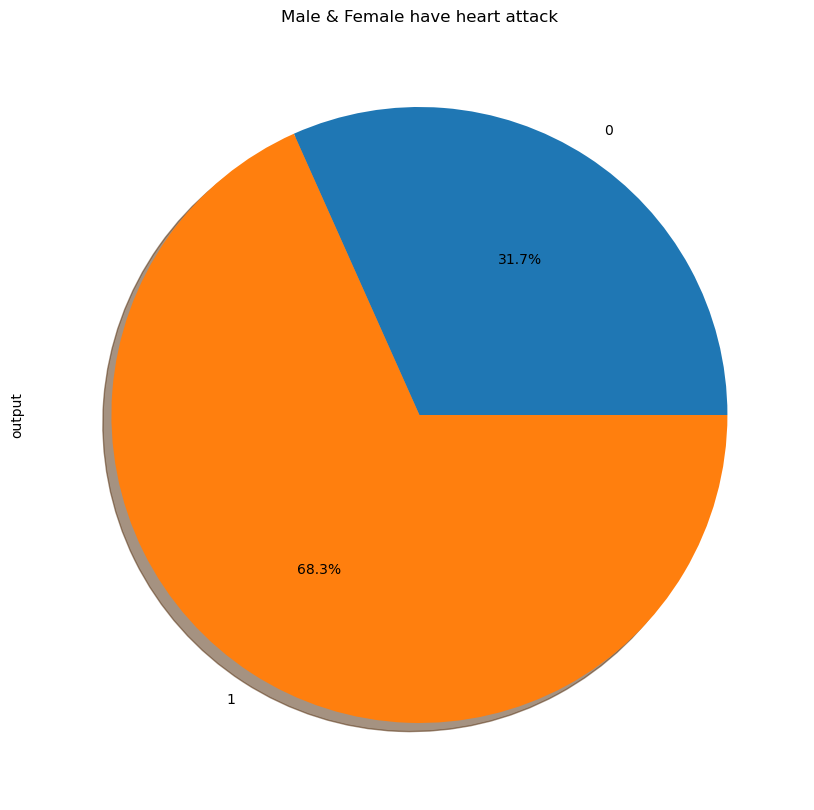

In [8]:
# make groupby and pie graph to see how the percentage [ male and female]
# 1 male & 0 female
df.groupby('sex')["output"].count().plot(kind="pie",autopct='%1.1f%%',shadow=True,figsize=(10,10),title="Male & Female have heart attack")

<AxesSubplot:title={'center':'Chest Pain type chest pain type'}, ylabel='output'>

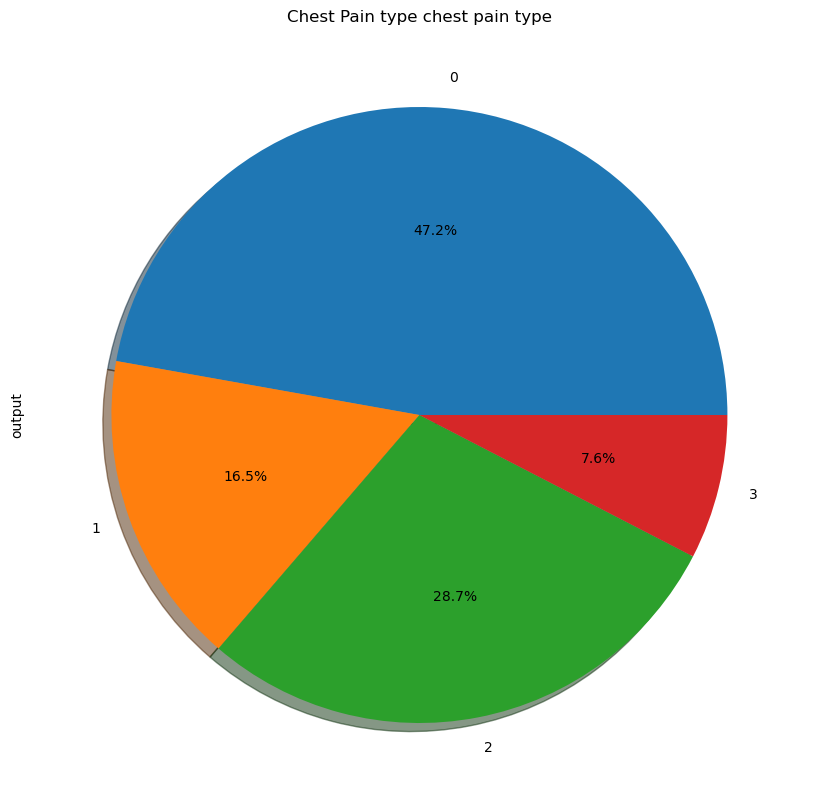

In [9]:
# make groupby and pie graph to see how the percentage [ Chest Pain type chest pain type]

df.groupby('cp')["output"].count().plot(kind="pie",autopct='%1.1f%%',shadow=True,figsize=(10,10),title="Chest Pain type chest pain type")

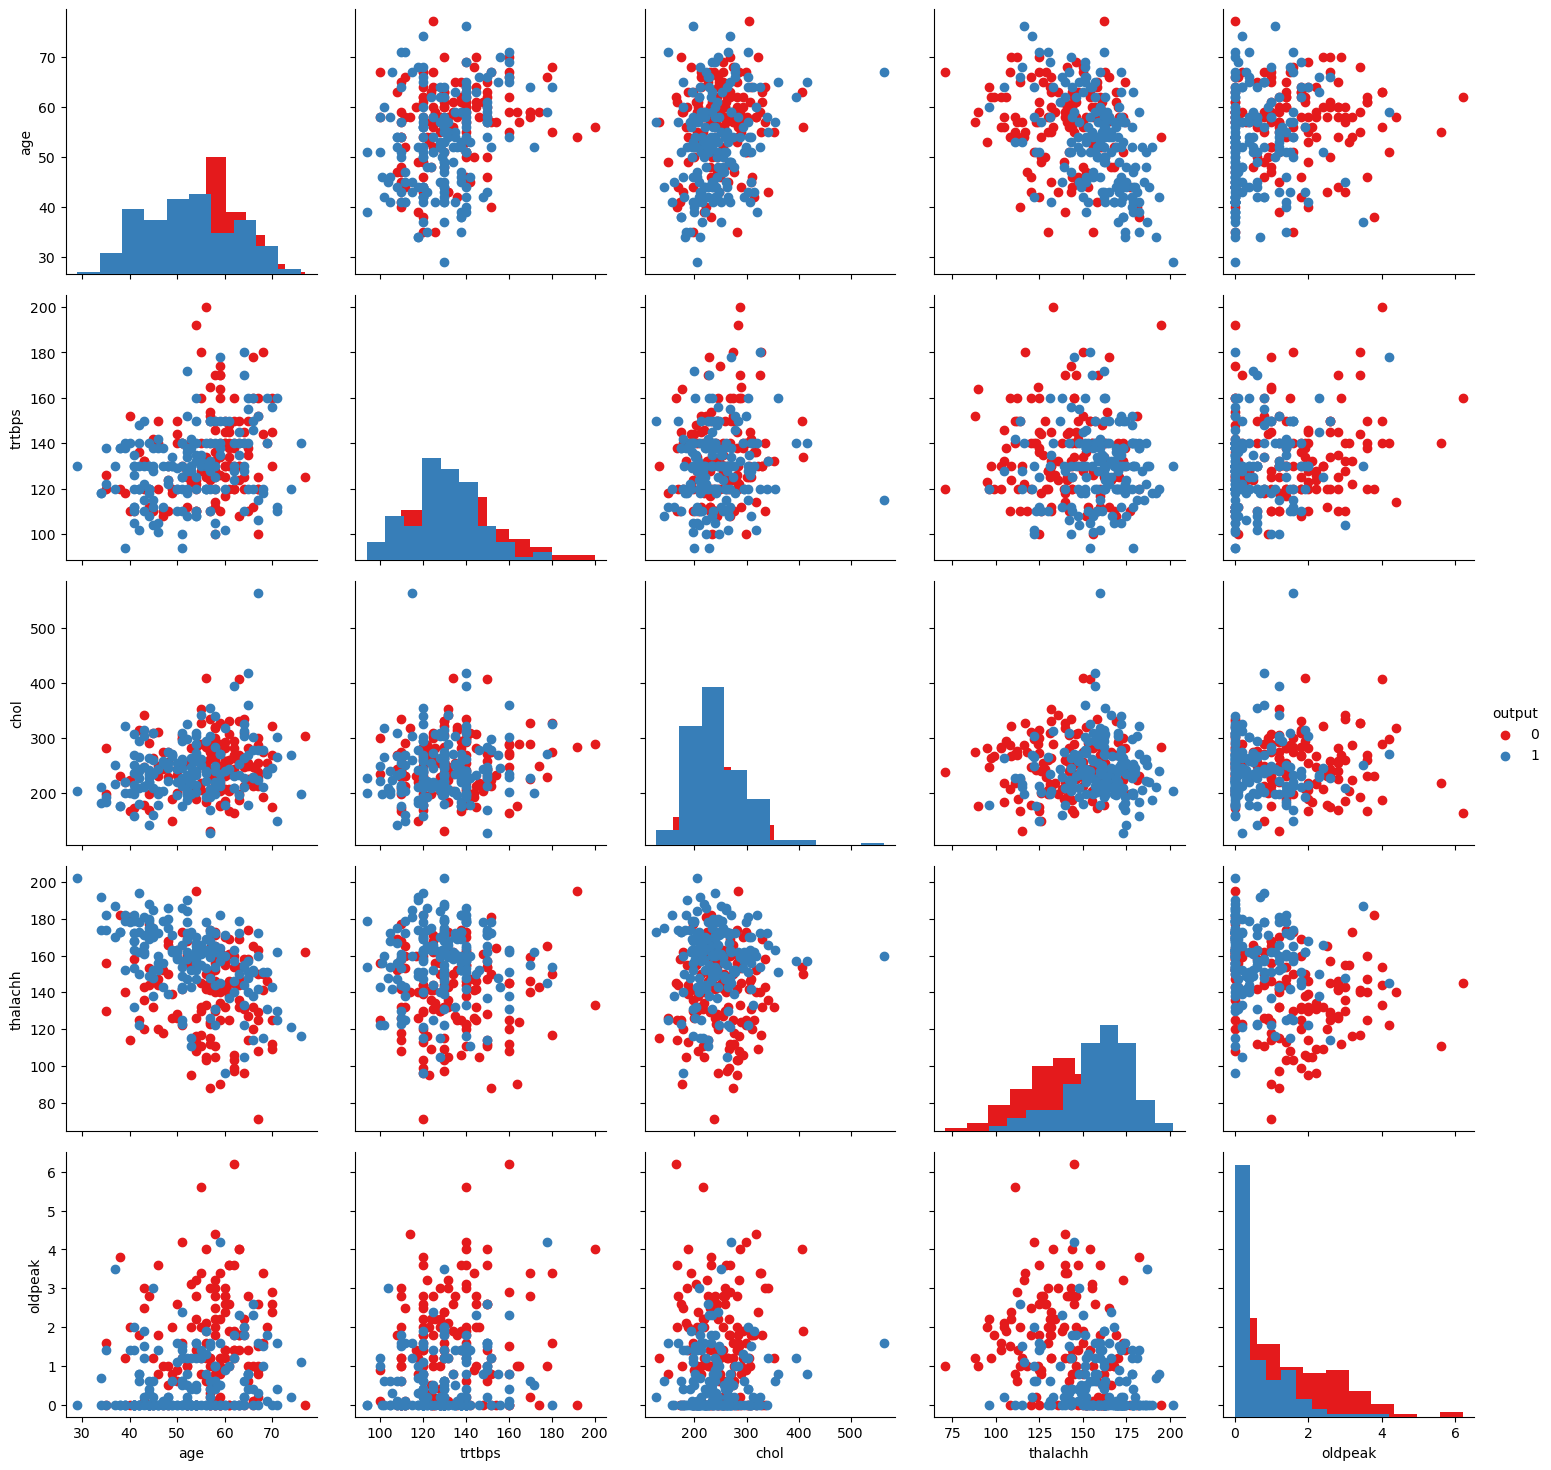

In [10]:
# scatter plot between features and each other according to the output
g = sns.PairGrid(df, vars=['age','trtbps','chol','thalachh','oldpeak'], hue='output', height=3, palette='Set1')
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
g.add_legend();

In [11]:
#splitting the dataset into 80% training and 20% testing
X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size = 0.2, random_state=5, shuffle=True)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(242, 13)
(61, 13)
(242,)
(61,)


In [12]:


Logistic_regr = LogisticRegression(penalty='l1', max_iter=5000, solver='saga')

In [13]:
Logistic_regr.fit(X_train,Y_train)
y_pred = Logistic_regr.predict(X_test)

In [14]:
#calculating differnt variety of scores for logestic regression
score=r2_score(Y_test,y_pred)
print('r2 socre = ',score)
print('mean_sqrd_error is= ',mean_squared_error(Y_test,y_pred))
print('root_mean_squared error= ',np.sqrt(mean_squared_error(Y_test,y_pred)))
print("training accuracy is : ", Logistic_regr.score(X_train,Y_train)*100)
print("testing accuracy is : ", Logistic_regr.score(X_test,Y_test)*100)

r2 socre =  0.5408602150537634
mean_sqrd_error is=  0.11475409836065574
root_mean_squared error=  0.3387537429470791
training accuracy is :  82.23140495867769
testing accuracy is :  88.52459016393442


(0.0, 1.0)

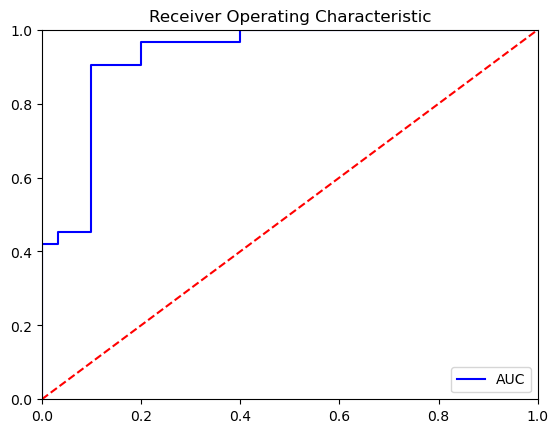

In [15]:
probs=Logistic_regr.predict_proba(X_test)
probs.shape
fpr, tpr, thresholds = roc_curve(np.array(Y_test).reshape(-1,1), probs[:, 1])
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC')
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])

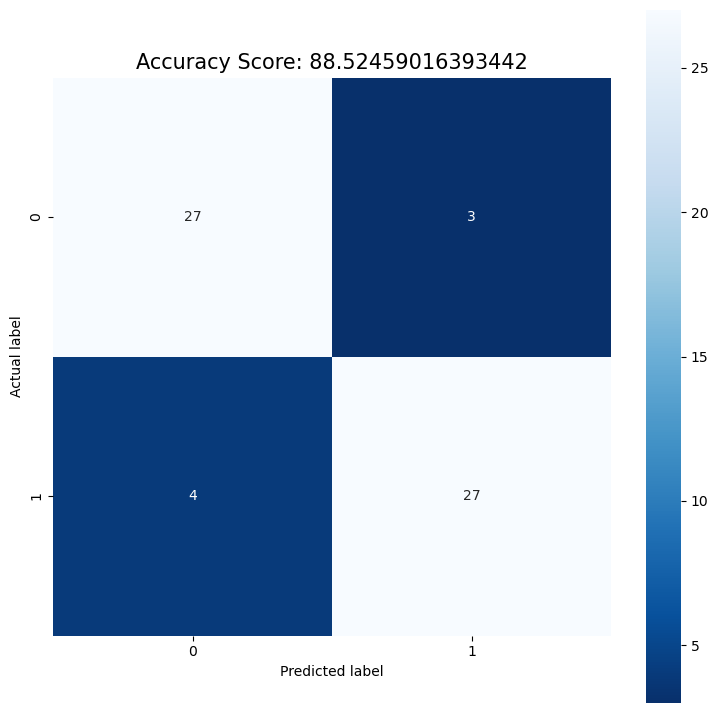

In [16]:
from sklearn import metrics
import seaborn as sns
cm = metrics.confusion_matrix(Y_test, y_pred)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(Logistic_regr.score(X_test,Y_test)*100)
plt.title(all_sample_title, size = 15);

Precision:  0.9
Recall:  0.8709677419354839


C:\Users\abdal\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.



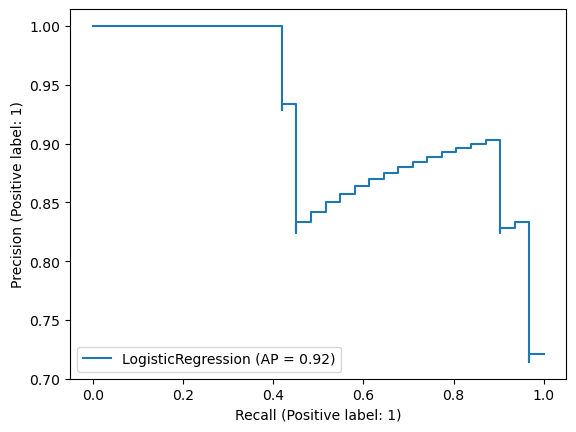

In [17]:
precision = precision_score(Y_test,y_pred)
recall = recall_score(Y_test, y_pred)
 
print('Precision: ',precision)
print('Recall: ',recall)
 
#Plotting Precision-Recall Curve
disp = plot_precision_recall_curve(Logistic_regr, X_test, Y_test)

In [18]:
DecisionTree = DecisionTreeClassifier()

In [19]:
DecisionTree.fit(X_train,Y_train)
y_pred = DecisionTree.predict(X_test)

In [20]:
##calculating differnt variety of scores for Decision Tree
score=r2_score(Y_test,y_pred)
print('r2 socre = ',score)
print('mean_sqrd_error is= ',mean_squared_error(Y_test,y_pred))
print('root_mean_squared error= ',np.sqrt(mean_squared_error(Y_test,y_pred)))
print("training accuracy is : ", DecisionTree.score(X_train,Y_train)*100)
print("testing accuracy is : ", DecisionTree.score(X_test,Y_test)*100)

r2 socre =  0.2784946236559138
mean_sqrd_error is=  0.18032786885245902
root_mean_squared error=  0.4246502900652006
training accuracy is :  100.0
testing accuracy is :  81.9672131147541


(0.0, 1.0)

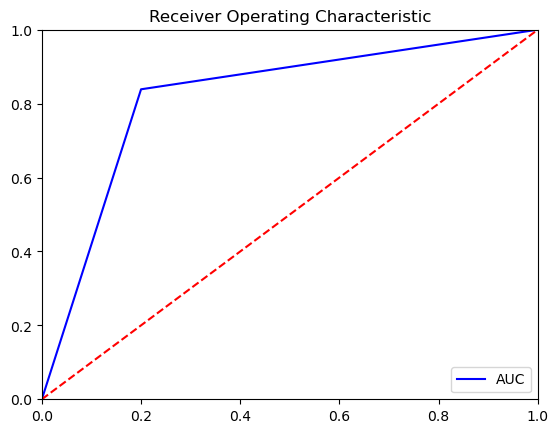

In [21]:
probs=DecisionTree.predict_proba(X_test)
probs.shape
fpr, tpr, thresholds = roc_curve(np.array(Y_test).reshape(-1,1), probs[:, 1])
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC')
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])

In [22]:
col_names = ['age','sex','cp','trtbps','chol','fbs','restecg','thalachh','exng','oldpeak','slp','caa','thall']

In [23]:
from sklearn import tree
import matplotlib.pyplot as plt
cn=['1','0']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (20,20), dpi=500)
tree.plot_tree(DecisionTree,
               feature_names = col_names, 
               class_names=cn,
               filled = True);
fig.savefig('imagename.png')

Precision:  0.8125
Recall:  0.8387096774193549


C:\Users\abdal\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.



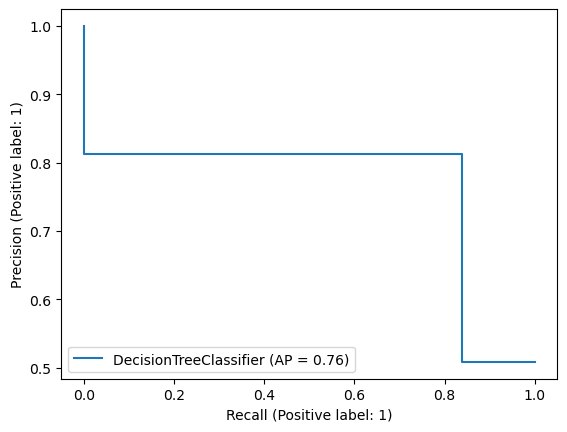

In [24]:
precision = precision_score(Y_test,y_pred)
recall = recall_score(Y_test, y_pred)
 
print('Precision: ',precision)
print('Recall: ',recall)
 
#Plotting Precision-Recall Curve
disp = plot_precision_recall_curve(DecisionTree, X_test, Y_test)

In [25]:
RandomForest = RandomForestClassifier()

In [26]:
RandomForest.fit(X_train,Y_train)
y_pred = RandomForest.predict(X_test)

In [27]:
##calculating differnt variety of scores for Random forest
score=r2_score(Y_test,y_pred)
print('r2 socre = ',score)
print('mean_sqrd_error is= ',mean_squared_error(Y_test,y_pred))
print('root_mean_squared error= ',np.sqrt(mean_squared_error(Y_test,y_pred)))
print("training accuracy is : ", RandomForest.score(X_train,Y_train)*100)
print("testing accuracy is : ", RandomForest.score(X_test,Y_test)*100)

r2 socre =  0.6064516129032258
mean_sqrd_error is=  0.09836065573770492
root_mean_squared error=  0.31362502409359
training accuracy is :  100.0
testing accuracy is :  90.1639344262295


(0.0, 1.0)

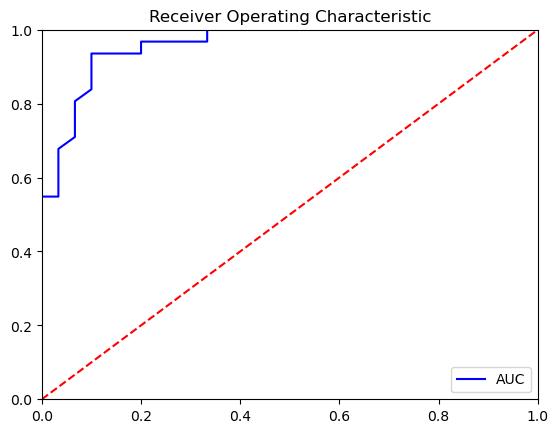

In [28]:
probs=RandomForest.predict_proba(X_test)
probs.shape
fpr, tpr, thresholds = roc_curve(np.array(Y_test).reshape(-1,1), probs[:, 1])
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC')
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])


Precision:  0.8787878787878788
Recall:  0.9354838709677419


C:\Users\abdal\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.



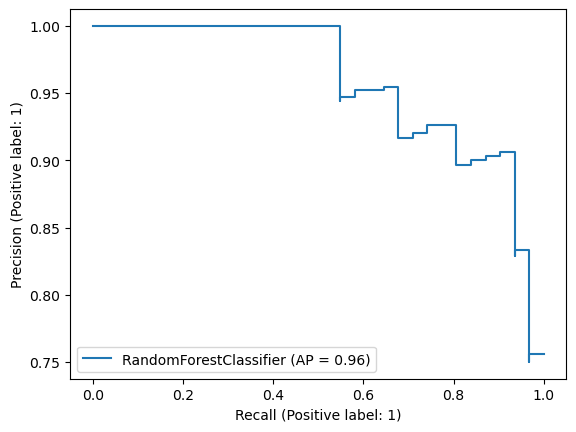

In [29]:
precision = precision_score(Y_test,y_pred)
recall = recall_score(Y_test, y_pred)
 
print('Precision: ',precision)
print('Recall: ',recall)
 
#Plotting Precision-Recall Curve
disp = plot_precision_recall_curve(RandomForest, X_test, Y_test)

In [30]:
from sklearn import metrics
scores_List=[]
for k in range(1,20):
    knn = KNeighborsClassifier(n_neighbors =k)
    knn.fit(X_train,Y_train)
    y_pred=knn.predict(X_test)
    scores_List.append(metrics.accuracy_score(Y_test,y_pred))


In [31]:
print(scores_List)

[0.5901639344262295, 0.6229508196721312, 0.6229508196721312, 0.639344262295082, 0.639344262295082, 0.7049180327868853, 0.7049180327868853, 0.6721311475409836, 0.6885245901639344, 0.7049180327868853, 0.6721311475409836, 0.6557377049180327, 0.6557377049180327, 0.6229508196721312, 0.6065573770491803, 0.5901639344262295, 0.6229508196721312, 0.6557377049180327, 0.6885245901639344]


Text(0, 0.5, 'accuracy')

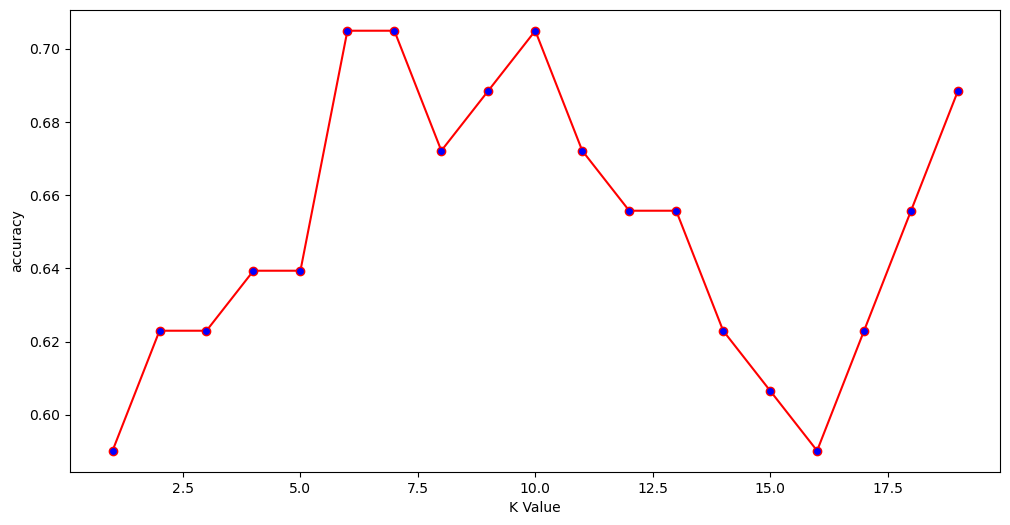

In [32]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 20),scores_List, color='red',marker='o', markerfacecolor='blue')
plt.xlabel('K Value')
plt.ylabel('accuracy')

In [33]:
KNeighbors = KNeighborsClassifier(n_neighbors=7)

In [34]:
KNeighbors.fit(X_train,Y_train)
y_pred = KNeighbors.predict(X_test)

In [35]:
#calculating differnt variety of scores for KNN
score=r2_score(Y_test,y_pred)
print('r2 socre = ',score)
print('mean_sqrd_error is= ',mean_squared_error(Y_test,y_pred))
print('root_mean_squared error= ',np.sqrt(mean_squared_error(Y_test,y_pred)))
print("training accuracy is : ", KNeighbors.score(X_train,Y_train)*100)
print("testing accuracy is : ", KNeighbors.score(X_test,Y_test)*100)

r2 socre =  -0.18064516129032282
mean_sqrd_error is=  0.29508196721311475
root_mean_squared error=  0.5432144762551112
training accuracy is :  73.96694214876032
testing accuracy is :  70.49180327868852


In [36]:
probs=knn.predict_proba(X_test)
probs.shape

(61, 2)

(0.0, 1.0)

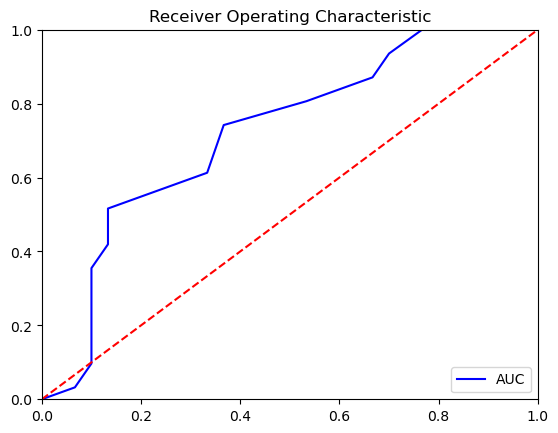

In [37]:
fpr, tpr, thresholds = roc_curve(np.array(Y_test).reshape(-1,1), probs[:, 1])
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC')
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])

In [38]:
score = roc_auc_score(Y_test, y_pred)
print(f"ROC AUC: {score:.4f}")

ROC AUC: 0.7038


Precision:  0.6857142857142857
Recall:  0.7741935483870968


C:\Users\abdal\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.



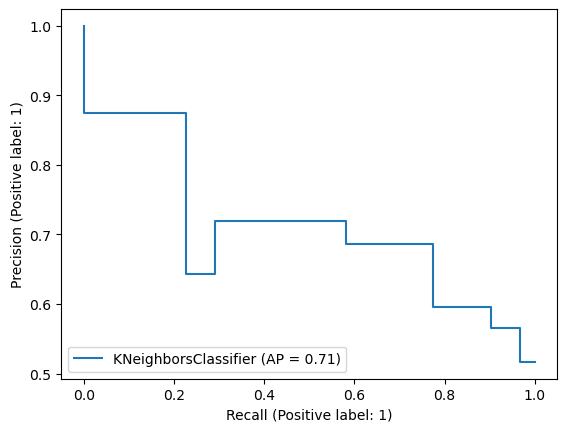

In [39]:
precision = precision_score(Y_test,y_pred)
recall = recall_score(Y_test, y_pred)
 
print('Precision: ',precision)
print('Recall: ',recall)
 
#Plotting Precision-Recall Curve
disp = plot_precision_recall_curve(KNeighbors, X_test, Y_test)

In [40]:
numeric_feature_names = ['age','trtbps','chol','thalachh','oldpeak']
numeric_features = df[numeric_feature_names]
numeric_features.head()

age  trtbps  chol  thalachh  oldpeak
0   63     145   233       150      2.3
1   37     130   250       187      3.5
2   41     130   204       172      1.4
3   56     120   236       178      0.8
4   57     120   354       163      0.6

In [41]:

tf.convert_to_tensor(numeric_features)

<tf.Tensor: shape=(303, 5), dtype=float64, numpy=
array([[ 63. , 145. , 233. , 150. ,   2.3],
       [ 37. , 130. , 250. , 187. ,   3.5],
       [ 41. , 130. , 204. , 172. ,   1.4],
       ...,
       [ 68. , 144. , 193. , 141. ,   3.4],
       [ 57. , 130. , 131. , 115. ,   1.2],
       [ 57. , 130. , 236. , 174. ,   0. ]])>

In [42]:
#Adding Normalization to the model
normalizer = tf.keras.layers.Normalization(axis=-1)#is a clean and simple way to add feature normalization into your model.
normalizer.adapt(numeric_features)#first step is to create the layer
normalizer(numeric_features.iloc[:3])

<tf.Tensor: shape=(3, 5), dtype=float32, numpy=
array([[ 0.9521962 ,  0.7639548 , -0.25633398,  0.01544273,  1.087338  ],
       [-1.9153134 , -0.09273875,  0.07219928,  1.6334714 ,  2.1225727 ],
       [-1.474158  , -0.09273875, -0.81677306,  0.97751385,  0.31091198]],
      dtype=float32)>

In [43]:
def get_basic_model():
  model = tf.keras.Sequential([
    normalizer,
    tf.keras.layers.Dense(10, activation='relu'),#dense=hidden layers, units=number of neurons
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(1)
  ])

  model.compile(optimizer='sgd',
                loss='mean_squared_error',
                metrics=['accuracy'])
  return model

In [44]:
model = get_basic_model()
model.fit(numeric_features, y, epochs=300, batch_size=3)
# fit= training, epochs=iterations over the training set 
#We call fit(), which will train the model by slicing the data into "batches" of size batch_size, 
#and repeatedly iterating over the entire dataset for a given number of epochs.

Epoch 1/300
101/101 [==============================] - 1s 1ms/step - loss: 0.2921 - accuracy: 0.5248
Epoch 2/300
101/101 [==============================] - 0s 1ms/step - loss: 0.2068 - accuracy: 0.6733
Epoch 3/300
101/101 [==============================] - 0s 1ms/step - loss: 0.1968 - accuracy: 0.7063
Epoch 4/300
101/101 [==============================] - 0s 2ms/step - loss: 0.1949 - accuracy: 0.7063
Epoch 5/300
101/101 [==============================] - 0s 1ms/step - loss: 0.1877 - accuracy: 0.7360
Epoch 6/300
101/101 [==============================] - 0s 960us/step - loss: 0.1810 - accuracy: 0.7360
Epoch 7/300
101/101 [==============================] - 0s 927us/step - loss: 0.1810 - accuracy: 0.7525
Epoch 8/300
101/101 [==============================] - 0s 1ms/step - loss: 0.1773 - accuracy: 0.7360
Epoch 9/300
101/101 [==============================] - 0s 1ms/step - loss: 0.1738 - accuracy: 0.7624
Epoch 10/300
101/101 [==============================] - 0s 1ms/step - loss: 0.1737 - ac